<a href="https://colab.research.google.com/github/cuixx289/STAT-6289_Homework/blob/master/STAT_6289_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

In [ ]:
#problem a
batch_size = 32
num_classes = 10
epochs = 10
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [ ]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 4s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    CNN = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Using real-time data augmentation.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
1563/1563 [==============================] - 259s 166ms/step - loss: 1.8822 - accuracy: 0.3049 - val_loss: 1.5418 - val_accuracy: 0.4420
Epoch 2/10
1563/1563 [==============================] - 260s 166ms/step - loss: 1.5840 - accuracy: 0.4203 - val_loss: 1.3991 - val_accuracy: 0.4906
Epoch 3/10
1563/1563 [==============================] - 264s 169ms/step - loss: 1.4675 - accuracy: 0.4674 - val_loss: 1.3463 - val_accuracy: 0.5148
Epoch 4/10
1563/1563 [==============================] - 257s 165ms/step - loss: 1.3848 - accuracy: 0.5035 - val_loss: 1.2320 - val_accuracy: 0.5589
Epoch 5/10
1563/1563 [==============================] - 262s 167ms/step - loss: 1.3211 - accuracy: 0.5280 - val_loss: 1.1656 - val_accuracy: 0.5897
Epoch 6/10
1563/1563 [==============================] - 248s 159ms/step - loss: 1.2676 - accuracy: 0.5490 - val_loss: 1.1452 - val_accuracy: 0.5925
E

In [ ]:
#0 layer
model0 = Sequential()
model0.add(Flatten())
model0.add(Dense(num_classes))
model0.add(Dropout(0.5))
model0.add(Activation('softmax'))
model0.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
 # Fit the model on the batches generated by datagen.flow().
 
m0 = model0.fit_generator(datagen.flow(x_train, y_train,
                             batch_size=batch_size),
                epochs=epochs,
                validation_data=(x_test, y_test),
                workers=4)

Epoch 1/10
1563/1563 [==============================] - 30s 19ms/step - loss: 2.1787 - accuracy: 0.2083 - val_loss: 1.9962 - val_accuracy: 0.3098
Epoch 2/10
1563/1563 [==============================] - 30s 19ms/step - loss: 2.1296 - accuracy: 0.2336 - val_loss: 1.9535 - val_accuracy: 0.3400
Epoch 3/10
1563/1563 [==============================] - 31s 20ms/step - loss: 2.1144 - accuracy: 0.2404 - val_loss: 1.9377 - val_accuracy: 0.3415
Epoch 4/10
1563/1563 [==============================] - 31s 20ms/step - loss: 2.1049 - accuracy: 0.2456 - val_loss: 1.9245 - val_accuracy: 0.3603
Epoch 5/10
1563/1563 [==============================] - 31s 20ms/step - loss: 2.0976 - accuracy: 0.2518 - val_loss: 1.9206 - val_accuracy: 0.3559
Epoch 6/10
1563/1563 [==============================] - 30s 19ms/step - loss: 2.0933 - accuracy: 0.2511 - val_loss: 1.9141 - val_accuracy: 0.3629
Epoch 7/10
1563/1563 [==============================] - 30s 19ms/step - loss: 2.0866 - accuracy: 0.2559 - val_loss: 1.9133 -

In [13]:
#1 layer
epochs = 10

model1 = Sequential()


model1.add(Flatten())
model1.add(Dense(512))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))
model1.add(Dense(num_classes))
model1.add(Activation('softmax'))

model1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
m1 = model1.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)
    

Epoch 1/10
1563/1563 [==============================] - 31s 20ms/step - loss: 2.0181 - accuracy: 0.2669 - val_loss: 1.8304 - val_accuracy: 0.3453
Epoch 2/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.8886 - accuracy: 0.3183 - val_loss: 1.7393 - val_accuracy: 0.3894
Epoch 3/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.8396 - accuracy: 0.3409 - val_loss: 1.6863 - val_accuracy: 0.4136
Epoch 4/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.8079 - accuracy: 0.3554 - val_loss: 1.6535 - val_accuracy: 0.4273
Epoch 5/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.7862 - accuracy: 0.3614 - val_loss: 1.6444 - val_accuracy: 0.4231
Epoch 6/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.7658 - accuracy: 0.3738 - val_loss: 1.6055 - val_accuracy: 0.4346
Epoch 7/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.7510 - accuracy: 0.3761 - val_loss: 1.5879 -

In [20]:
#2 layers
epochs = 10

model2 = Sequential()


model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes))
model2.add(Activation('softmax'))

model2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
m2 = model2.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Epoch 1/10
1563/1563 [==============================] - 30s 20ms/step - loss: 2.0880 - accuracy: 0.2297 - val_loss: 1.8534 - val_accuracy: 0.3431
Epoch 2/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.9449 - accuracy: 0.2892 - val_loss: 1.7843 - val_accuracy: 0.3638
Epoch 3/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.8991 - accuracy: 0.3124 - val_loss: 1.7191 - val_accuracy: 0.3871
Epoch 4/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.8662 - accuracy: 0.3293 - val_loss: 1.6891 - val_accuracy: 0.4055
Epoch 5/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.8493 - accuracy: 0.3366 - val_loss: 1.7250 - val_accuracy: 0.3892
Epoch 6/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.8316 - accuracy: 0.3439 - val_loss: 1.6486 - val_accuracy: 0.4258
Epoch 7/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.8137 - accuracy: 0.3545 - val_loss: 1.6105 -

In [24]:
#3 layers
epochs = 10

model3 = Sequential()

model3.add(Flatten())
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model3.add(Dense(512))
model3.add(Activation('relu'))
model3.add(Dropout(0.5))
model3.add(Dense(512))
model3.add(Activation('relu'))
model3.add(Dropout(0.5))
model3.add(Dense(num_classes))
model3.add(Activation('softmax'))

model3.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
m3 = model3.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Epoch 1/10
1563/1563 [==============================] - 30s 19ms/step - loss: 2.0958 - accuracy: 0.2283 - val_loss: 1.8548 - val_accuracy: 0.3485
Epoch 2/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.9503 - accuracy: 0.2907 - val_loss: 1.7897 - val_accuracy: 0.3676
Epoch 3/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.9003 - accuracy: 0.3110 - val_loss: 1.7275 - val_accuracy: 0.3881
Epoch 4/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.8688 - accuracy: 0.3280 - val_loss: 1.7185 - val_accuracy: 0.3933
Epoch 5/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.8459 - accuracy: 0.3378 - val_loss: 1.6996 - val_accuracy: 0.3989
Epoch 6/10
1563/1563 [==============================] - 30s 20ms/step - loss: 1.8334 - accuracy: 0.3426 - val_loss: 1.6639 - val_accuracy: 0.4151
Epoch 7/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.8144 - accuracy: 0.3508 - val_loss: 1.6209 -

In [25]:
#4 layers
epochs = 10

model4 = Sequential()

model4.add(Flatten())
model4.add(Dense(512))
model4.add(Activation('relu'))
model4.add(Dropout(0.5))
model4.add(Dense(512))
model4.add(Activation('relu'))
model4.add(Dropout(0.5))
model4.add(Dense(512))
model4.add(Activation('relu'))
model4.add(Dropout(0.5))
model4.add(Dense(512))
model4.add(Activation('relu'))
model4.add(Dropout(0.5))
model4.add(Dense(num_classes))
model4.add(Activation('softmax'))


model4.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
m4 = model4.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Epoch 1/10
1563/1563 [==============================] - 31s 20ms/step - loss: 2.2284 - accuracy: 0.1517 - val_loss: 2.0520 - val_accuracy: 0.2310
Epoch 2/10
1563/1563 [==============================] - 31s 20ms/step - loss: 2.0669 - accuracy: 0.2184 - val_loss: 1.9192 - val_accuracy: 0.2810
Epoch 3/10
1563/1563 [==============================] - 31s 20ms/step - loss: 2.0112 - accuracy: 0.2451 - val_loss: 1.8830 - val_accuracy: 0.3166
Epoch 4/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.9749 - accuracy: 0.2717 - val_loss: 1.8370 - val_accuracy: 0.3576
Epoch 5/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.9465 - accuracy: 0.2816 - val_loss: 1.8314 - val_accuracy: 0.3447
Epoch 6/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.9299 - accuracy: 0.2904 - val_loss: 1.7965 - val_accuracy: 0.3708
Epoch 7/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.9169 - accuracy: 0.2982 - val_loss: 1.8023 -

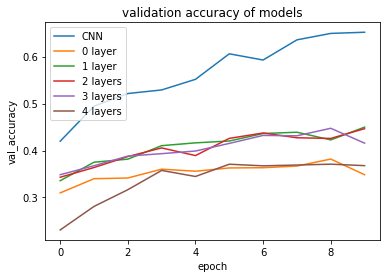

In [27]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(CNN.history['val_accuracy'])
plt.plot(m0.history['val_accuracy'])
plt.plot(m1.history['val_accuracy'])
plt.plot(m2.history['val_accuracy'])
plt.plot(m3.history['val_accuracy'])
plt.plot(m4.history['val_accuracy'])
plt.title('validation accuracy of models')
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.legend(['CNN', '0 layer','1 layer'
            ,'2 layers','3 layers',
           '4 layers'], loc='upper left')
plt.savefig('')
plt.show()


#Explain Part a
The convolutional network gives us the best accuracy. The convolutional network is much better because it is sparse
with shared weights. As we increase
the number of dense hidden layers from 1 to 4, the less test accuracy we have, and the optimizer (rmsprop) is more difficult to find the best weights. 


In [28]:
## problem b


modelSig = Sequential()
modelSig.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
modelSig.add(Activation('sigmoid'))
modelSig.add(Conv2D(32, (3, 3)))
modelSig.add(Activation('sigmoid'))
modelSig.add(MaxPooling2D(pool_size=(2, 2)))
modelSig.add(Dropout(0.25))

modelSig.add(Conv2D(64, (3, 3), padding='same'))
modelSig.add(Activation('sigmoid'))
modelSig.add(Conv2D(64, (3, 3)))
modelSig.add(Activation('sigmoid'))
modelSig.add(MaxPooling2D(pool_size=(2, 2)))
modelSig.add(Dropout(0.25))

modelSig.add(Flatten())
modelSig.add(Dense(512))
modelSig.add(Activation('sigmoid'))
modelSig.add(Dropout(0.5))
modelSig.add(Dense(num_classes))
modelSig.add(Activation('softmax'))

modelSig.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

    # Fit the model on the batches generated by datagen.flow().
Sigmoid = modelSig.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)


Epoch 1/10
1563/1563 [==============================] - 33s 21ms/step - loss: 2.3347 - accuracy: 0.1022 - val_loss: 2.3039 - val_accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 33s 21ms/step - loss: 2.3077 - accuracy: 0.1000 - val_loss: 2.3033 - val_accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 33s 21ms/step - loss: 2.3066 - accuracy: 0.1002 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 33s 21ms/step - loss: 2.3060 - accuracy: 0.0999 - val_loss: 2.3047 - val_accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 33s 21ms/step - loss: 2.3057 - accuracy: 0.1011 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 33s 21ms/step - loss: 2.3053 - accuracy: 0.0987 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 32s 21ms/step - loss: 2.3039 - accuracy: 0.1043 - val_loss: 2.2770 -

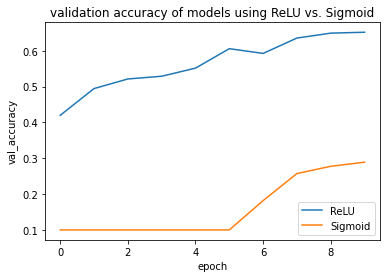

In [29]:
# summarize history for accuracy
plt.plot(CNN.history['val_accuracy'])
plt.plot(Sigmoid.history['val_accuracy'])
plt.title('validation accuracy of models using ReLU vs. Sigmoid')
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.legend(['ReLU', 'Sigmoid'], loc='lower right')
plt.savefig('')
plt.show()

#Explain Part b
The ReLU has much better accuracy than sigmoid units. Sigmoid is used to do the gradient vanishing
problem. In the first 5 epochs, the Sigmoid units didn't imporve the accuracy at all,because the starting point is around the tails of the sigmoid whose gradient is near 0. 

In [30]:
## problem c
# with Drop out and augmentation (CNN)

batch_size = 32
num_classes = 10
epochs = 20
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    CNN = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Using real-time data augmentation.
Epoch 1/20
1563/1563 [==============================] - 33s 21ms/step - loss: 1.9015 - accuracy: 0.2972 - val_loss: 1.5955 - val_accuracy: 0.4259
Epoch 2/20
1563/1563 [==============================] - 34s 22ms/step - loss: 1.5904 - accuracy: 0.4199 - val_loss: 1.4021 - val_accuracy: 0.4958
Epoch 3/20
1563/1563 [==============================] - 33s 21ms/step - loss: 1.4678 - accuracy: 0.4712 - val_loss: 1.3154 - val_accuracy: 0.5232
Epoch 4/20
1563/1563 [==============================] - 34s 22ms/step - loss: 1.3850 - accuracy: 0.5017 - val_loss: 1.2276 - val_accuracy: 0.5561
Epoch 5/20
1563/1563 [==============================] - 34s 21ms/step - loss: 1.3183 - accuracy: 0.5288 - val_loss: 1.2252 - val_accuracy: 0.5662
Epoch 6/20
1563/1563 [==============================] - 34s 22ms/step - loss: 1.2519 - accuracy: 0.5525 - val_loss: 1.1161 - val_accuracy: 0.6055
Epoch 7/20
1563/

In [41]:
# no Dropout but augmentation
epochs = 20

data_augmentation = True

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))



# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


if not data_augmentation:
    print('Not using data augmentation.')
    Aug_NoDrop = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)



    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    Aug_NoDrop= model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Using real-time data augmentation.
Epoch 1/20
1563/1563 [==============================] - 33s 21ms/step - loss: 1.7534 - accuracy: 0.3652 - val_loss: 1.5085 - val_accuracy: 0.4457
Epoch 2/20
1563/1563 [==============================] - 32s 21ms/step - loss: 1.4966 - accuracy: 0.4606 - val_loss: 1.3892 - val_accuracy: 0.5100
Epoch 3/20
1563/1563 [==============================] - 33s 21ms/step - loss: 1.3711 - accuracy: 0.5127 - val_loss: 1.2737 - val_accuracy: 0.5452
Epoch 4/20
1563/1563 [==============================] - 33s 21ms/step - loss: 1.2806 - accuracy: 0.5447 - val_loss: 1.1239 - val_accuracy: 0.6027
Epoch 5/20
1563/1563 [==============================] - 33s 21ms/step - loss: 1.2058 - accuracy: 0.5723 - val_loss: 1.1955 - val_accuracy: 0.5741
Epoch 6/20
1563/1563 [==============================] - 33s 21ms/step - loss: 1.1427 - accuracy: 0.5981 - val_loss: 1.0708 - val_accuracy: 0.6280
Epoch 7/20
1563/1563 [==============================] - 33s 21ms/step - loss: 1.0883 - ac

In [51]:
# no augmentation but Dropout
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


data_augmentation = False

if not data_augmentation:
    print('Not using data augmentation.')
    NoAug = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    NoAug = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Not using data augmentation.
Epoch 1/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.8484 - accuracy: 0.3230 - val_loss: 1.5588 - val_accuracy: 0.4358
Epoch 2/20
1563/1563 [==============================] - 9s 5ms/step - loss: 1.5439 - accuracy: 0.4385 - val_loss: 1.4325 - val_accuracy: 0.4762
Epoch 3/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4174 - accuracy: 0.4920 - val_loss: 1.3259 - val_accuracy: 0.5279
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3263 - accuracy: 0.5259 - val_loss: 1.2421 - val_accuracy: 0.5598
Epoch 5/20
1563/1563 [==============================] - 9s 5ms/step - loss: 1.2572 - accuracy: 0.5540 - val_loss: 1.1447 - val_accuracy: 0.5951
Epoch 6/20
1563/1563 [==============================] - 9s 5ms/step - loss: 1.1943 - accuracy: 0.5794 - val_loss: 1.1209 - val_accuracy: 0.6072
Epoch 7/20
1563/1563 [==============================] - 9s 5ms/step - loss: 1.1397 - accuracy: 0.5993 - val

In [54]:
# no augmentation no Dropout
epochs = 20

data_augmentation = False

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


if not data_augmentation:
    print('Not using data augmentation.')
    NoNo = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    NoNo = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Not using data augmentation.
Epoch 1/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6952 - accuracy: 0.3967 - val_loss: 1.5489 - val_accuracy: 0.4333
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3688 - accuracy: 0.5120 - val_loss: 1.3593 - val_accuracy: 0.5317
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2267 - accuracy: 0.5676 - val_loss: 1.3237 - val_accuracy: 0.5308
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1216 - accuracy: 0.6065 - val_loss: 1.1011 - val_accuracy: 0.6096
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0378 - accuracy: 0.6388 - val_loss: 1.0540 - val_accuracy: 0.6339
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9657 - accuracy: 0.6653 - val_loss: 1.0575 - val_accuracy: 0.6352
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9069 - accuracy: 0.6890 - val

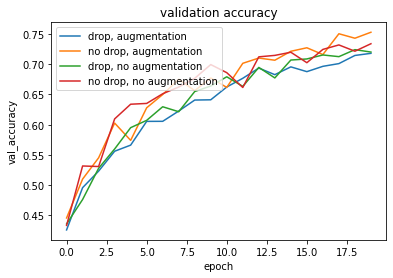

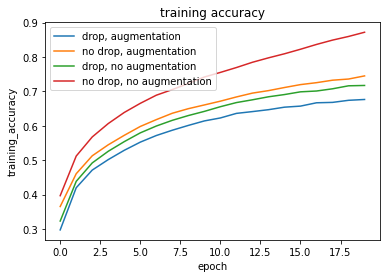

In [57]:
# summarize history for validation accuracy
plt.plot(CNN.history['val_accuracy'])
plt.plot(Aug_NoDrop.history['val_accuracy'])
plt.plot(NoAug.history['val_accuracy'])
plt.plot(NoNo.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.legend(['drop, augmentation', 'no drop, augmentation',
           'drop, no augmentation','no drop, no augmentation'], loc='upper left')
plt.savefig('')
plt.show()

# summarize history for training accuracy
plt.plot(CNN.history['accuracy'])
plt.plot(Aug_NoDrop.history['accuracy'])
plt.plot(NoAug.history['accuracy'])
plt.plot(NoNo.history['accuracy'])
plt.title('training accuracy')
plt.ylabel('training_accuracy')
plt.xlabel('epoch')
plt.legend(['drop, augmentation', 'no drop, augmentation',
           'drop, no augmentation','no drop, no augmentation'], loc='upper left')
plt.show()

No dropout and No data augmentation learns the fastest,but it also overfits the most
as we increase the number of iterations. Data augmentation made the best improvement of generalization. When there is no data augmentation, dropout is the second choice to improve generalization.